In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Redwine_Dataset.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#lets check number of rows and columns
df.shape

(1599, 12)

In [4]:
#lets check null values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#lets check for the Datatypes
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

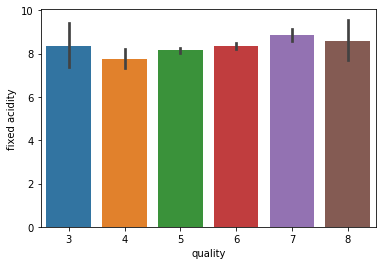

In [6]:
#here now we will check every parameter with respect to the quality
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)
plt.show()

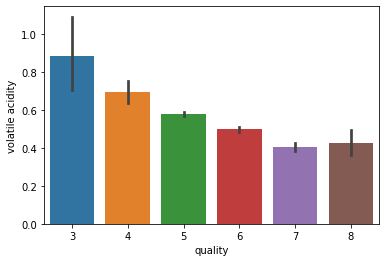

In [8]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)
plt.show()
#here we can see that if volatile acidity decreases , quality is also decreases.

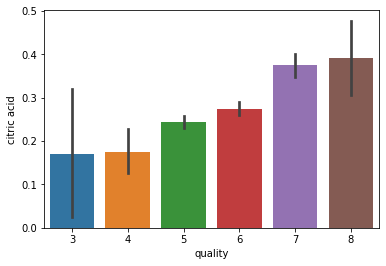

In [10]:
sns.barplot(x = 'quality', y = 'citric acid', data = df)
plt.show()
#here we can see that if citric acid increases , quality is also increases.

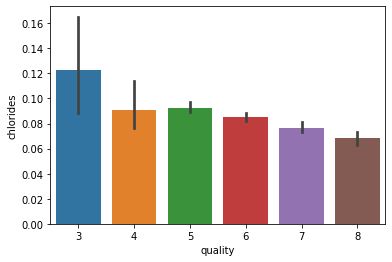

In [12]:
sns.barplot(x = 'quality', y = 'chlorides', data = df)
plt.show()
#Composition of chloride also go down as we go higher in the quality of the wine

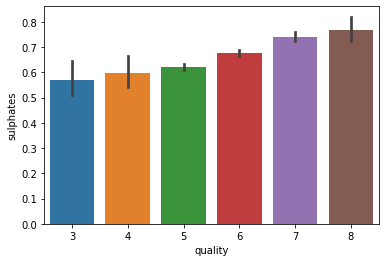

In [14]:
sns.barplot(x = 'quality', y = 'sulphates', data = df)
plt.show()
#Sulphates level goes higher with the quality of wine

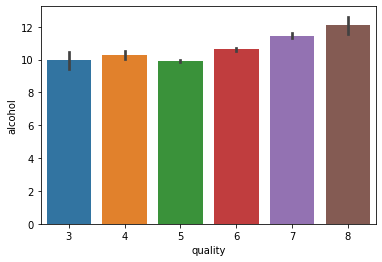

In [16]:
sns.barplot(x = 'quality', y = 'alcohol', data = df)
plt.show()
#alchohol increases quality is also increases

In [17]:
#lets check the skewness
df.skew()
#here you can see that some values are beyond the range so we will remove the skewness

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [18]:
#change the values in each columns by replacing log1 values
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [19]:
df.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                 0.217802
dtype: float64

In [20]:
#after skewing operation it is also showing one figure larger than 0.55 so we will go ahead with the standard scaling

In [22]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(1599, 12)
(1480, 12)


In [26]:
#as per the sourse provided from your side i will go ahead with this ...
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [30]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [31]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [32]:
#lets check value counts
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [147]:
#lets separate x and y
x = df_final.drop(columns=["quality"],axis=1)
y = df_final[["quality"]]

In [148]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=46,test_size=0.2,stratify=y)

In [149]:
#lets check the shapes
print(y_train.shape,y_test.shape)

(1184, 1) (296, 1)


In [150]:
#Lets create a fucntion for different parameters for svm classifier
def svmkernel(ker):
    svc = SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [151]:
svmkernel('rbf')

0.6013513513513513
[[ 0  7  3  0  0]
 [ 0 83 44  0  0]
 [ 0 24 95  0  0]
 [ 0  3 34  0  0]
 [ 0  0  3  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.71      0.65      0.68       127
           6       0.53      0.80      0.64       119
           7       0.00      0.00      0.00        37
           8       0.00      0.00      0.00         3

    accuracy                           0.60       296
   macro avg       0.25      0.29      0.26       296
weighted avg       0.52      0.60      0.55       296



In [152]:
svmkernel('poly')

0.6418918918918919
[[ 0  7  3  0  0]
 [ 0 97 30  0  0]
 [ 0 26 93  0  0]
 [ 0  2 35  0  0]
 [ 0  0  3  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.73      0.76      0.75       127
           6       0.57      0.78      0.66       119
           7       0.00      0.00      0.00        37
           8       0.00      0.00      0.00         3

    accuracy                           0.64       296
   macro avg       0.26      0.31      0.28       296
weighted avg       0.54      0.64      0.59       296



In [153]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc = dtc.predict(x_test)
print(accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))

0.6655405405405406
[[ 3  5  0  2  0]
 [ 2 96 26  3  0]
 [ 6 27 71 13  2]
 [ 0  3  7 26  1]
 [ 0  0  1  1  1]]
              precision    recall  f1-score   support

           4       0.27      0.30      0.29        10
           5       0.73      0.76      0.74       127
           6       0.68      0.60      0.63       119
           7       0.58      0.70      0.63        37
           8       0.25      0.33      0.29         3

    accuracy                           0.67       296
   macro avg       0.50      0.54      0.52       296
weighted avg       0.67      0.67      0.67       296



In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [155]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
predgn = GNB.predict(x_test)
print(accuracy_score(y_test,predgn))
print(confusion_matrix(y_test,predgn))
print(classification_report(y_test,predgn))

0.6013513513513513
[[ 3  4  3  0  0]
 [ 2 94 28  3  0]
 [ 1 32 60 26  0]
 [ 0  2 12 21  2]
 [ 0  0  1  2  0]]
              precision    recall  f1-score   support

           4       0.50      0.30      0.37        10
           5       0.71      0.74      0.73       127
           6       0.58      0.50      0.54       119
           7       0.40      0.57      0.47        37
           8       0.00      0.00      0.00         3

    accuracy                           0.60       296
   macro avg       0.44      0.42      0.42       296
weighted avg       0.60      0.60      0.60       296



In [156]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.5777027027027027
[[ 0  8  2  0  0]
 [ 0 93 33  1  0]
 [ 0 41 77  1  0]
 [ 0  4 32  1  0]
 [ 0  0  3  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.64      0.73      0.68       127
           6       0.52      0.65      0.58       119
           7       0.33      0.03      0.05        37
           8       0.00      0.00      0.00         3

    accuracy                           0.58       296
   macro avg       0.30      0.28      0.26       296
weighted avg       0.53      0.58      0.53       296



In [157]:
#after applying different algorithm still it is showing 60 percent accuracy 
#Now we will go ahead with the ensemble learning algorithm

In [159]:
RFC = RandomForestClassifier(n_estimators=200)
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7331081081081081
[[  0   8   2   0   0]
 [  0 102  24   1   0]
 [  0  21  88  10   0]
 [  0   0  11  26   0]
 [  0   0   2   0   1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.78      0.80      0.79       127
           6       0.69      0.74      0.72       119
           7       0.70      0.70      0.70        37
           8       1.00      0.33      0.50         3

    accuracy                           0.73       296
   macro avg       0.63      0.52      0.54       296
weighted avg       0.71      0.73      0.72       296



In [160]:
#after using Random Forest Classifier we can get a nice accuracy as compare to other algorithms.

In [161]:
from sklearn.externals import joblib

In [162]:
joblib.dump(RFC , 'model_RedwineDataset.csv')

['model_RedwineDataset.csv']